In [60]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_best-selling_manga"
resp = requests.get(url, headers={"User-Agent": "manga-demo/0.1"})
soup = BeautifulSoup(resp.text, "lxml")

tables = soup.find_all("table", class_="wikitable")

df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]

df = pd.concat([df1, df2])

sales_col = df.iloc[:,6]
df["Sales_Millions"] = (
    sales_col
    .str.split() 
    .str[0]       
    .astype(float)
)


/var/folders/wf/jr9cvn3x32gf3ccg9m_ssrn40000gn/T/ipykernel_1290/1102368015.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df1 = pd.read_html(str(tables[0]))[0]
/var/folders/wf/jr9cvn3x32gf3ccg9m_ssrn40000gn/T/ipykernel_1290/1102368015.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df2 = pd.read_html(str(tables[1]))[0]


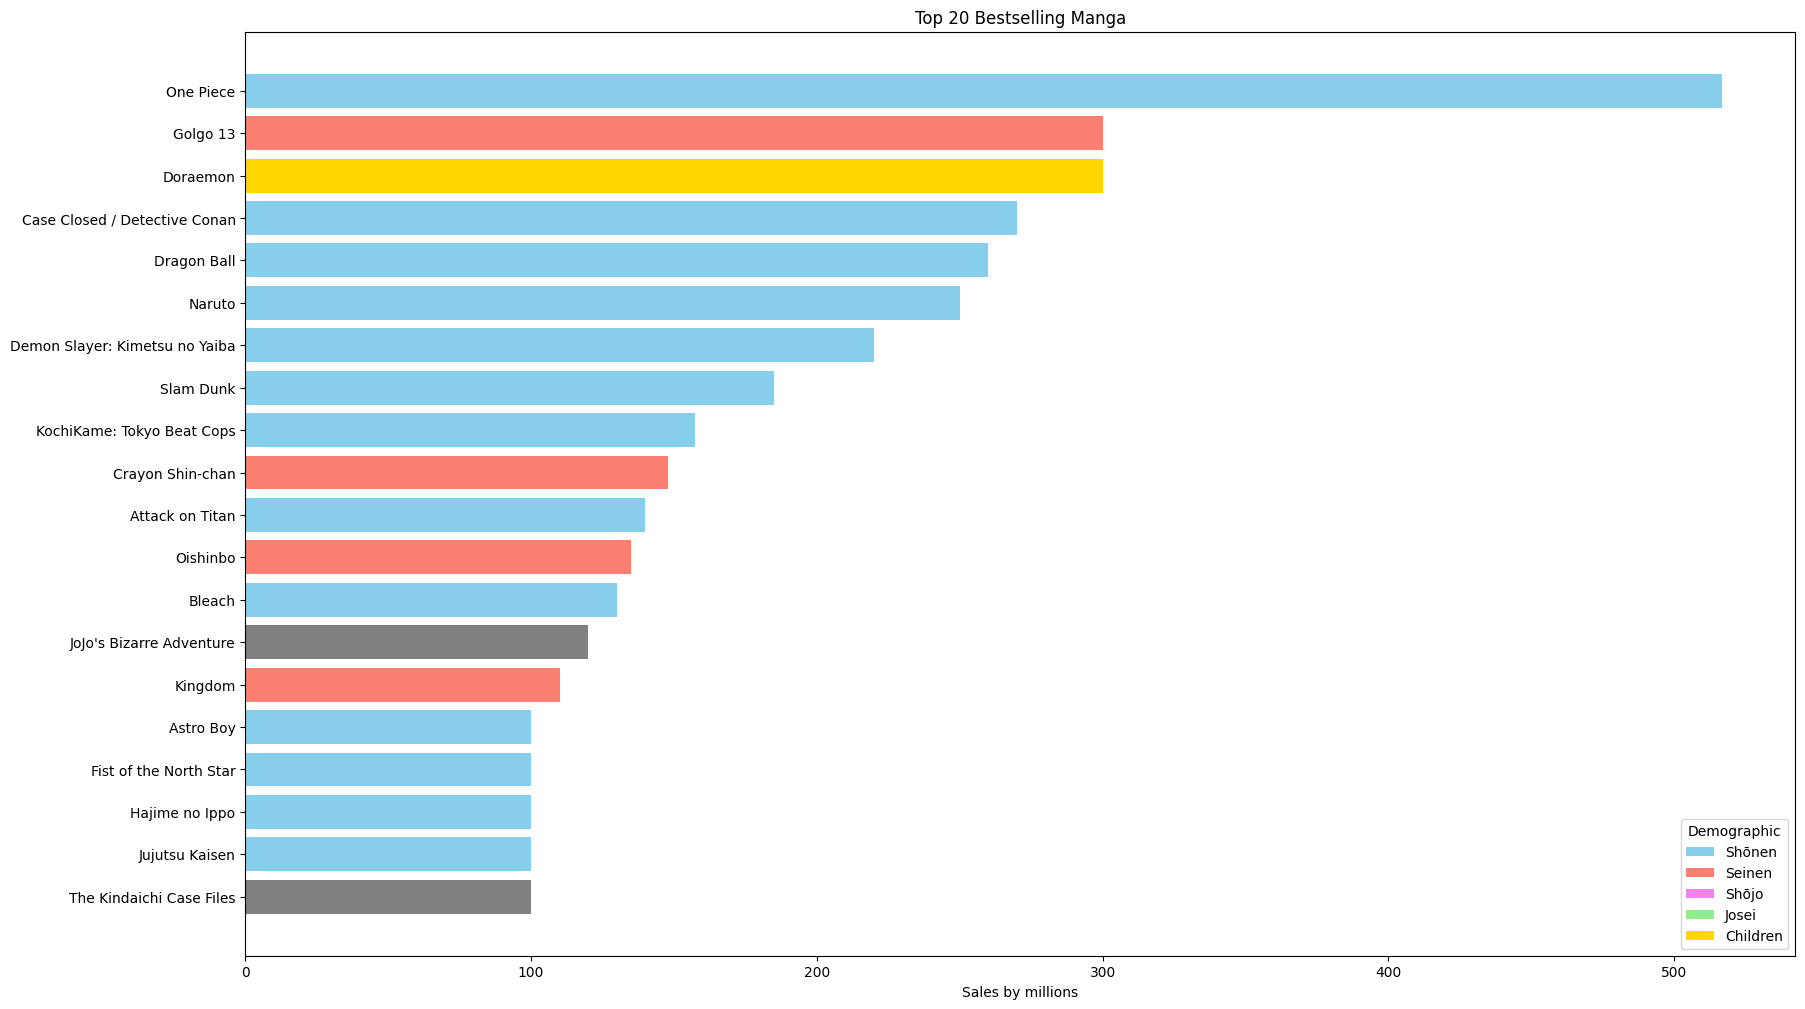

In [64]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
df["Demographic_clean"] = (
    df["Demographic"]
    .replace({"—": "Other"})
)

top20 = df.sort_values("Sales_Millions", ascending=False).head(20).copy()

palette = {
    "Shōnen": "skyblue",
    "Seinen": "salmon",
    "Shōjo": "violet",
    "Josei": "lightgreen",
    "Children": "gold"
}
colors = (
    top20["Demographic_clean"]
    .map(palette)
    .fillna("gray")  
    .tolist()
)
plt.figure(figsize=(20,12))
plt.barh(top20["Manga series"], top20["Sales_Millions"], color=colors)
plt.xlabel("Sales by millions")
plt.title("Top 20 Bestselling Manga")
plt.gca().invert_yaxis()

legend = [Patch(facecolor=c, label=k) for k, c in palette.items()]
plt.legend(handles=legend, title="Demographic", loc="lower right")
plt.savefig("top_20_manga.png")
plt.show()

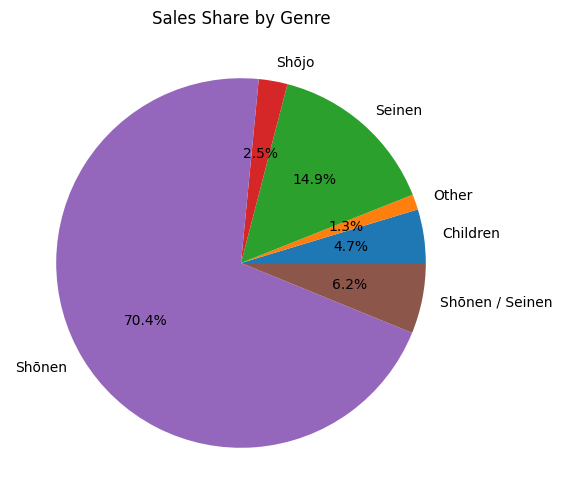

In [84]:
demo_sales = df.groupby("Demographic_clean")["Sales_Millions"].sum()
plt.figure(figsize=(6,6))
plt.pie(
    demo_sales,
    labels=demo_sales.index,
    autopct="%1.1f%%",
    startangle=0
)
plt.title("Sales Share by Genre")
plt.savefig("sales_share_by_genre.png")
plt.show()

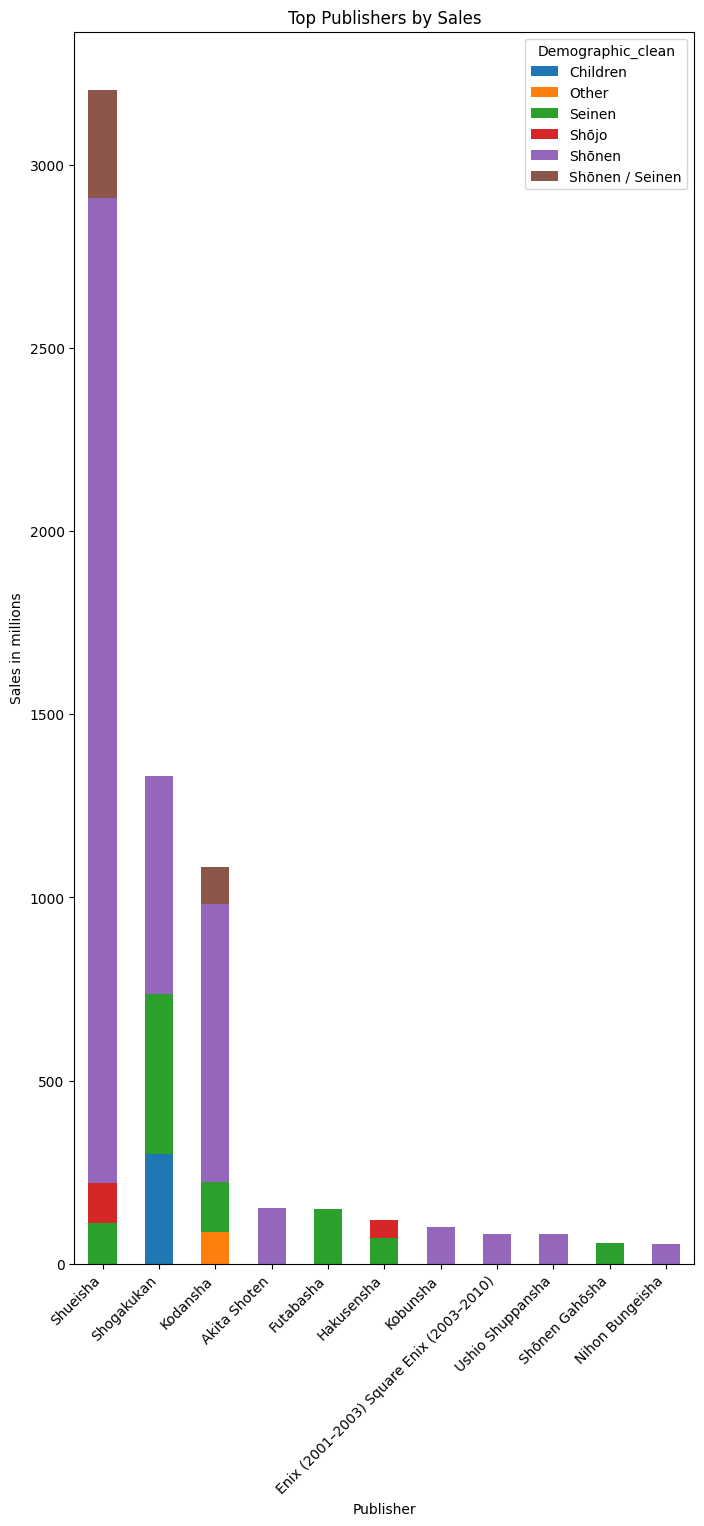

In [81]:
pub_demo = (
    df.groupby(["Publisher","Demographic_clean"])["Sales_Millions"]
      .sum()
      .unstack(fill_value=0)   
)

pub_demo = pub_demo.loc[pub_demo.sum(axis=1).sort_values(ascending=False).index]

ax = pub_demo.plot(kind="bar",
                   stacked=True,
                   figsize=(8,16))

plt.ylabel("Sales in millions")
plt.title("Top Publishers by Sales")
plt.xticks(rotation=45, ha="right")
plt.savefig("top_publishers_by_sales.png")
plt.show()